Fractals: logistic map

Used to model population growth, the iterative equation x(t+1) = rx(t)(1-x(t)) can give some cool results for different values of r. 

r is considered the limiting factor

first need to import some tools


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Then define our function - it_map

In [2]:
def it_map(xt, r):
    return r*xt*(1-xt)

Now lets define some parameters

In [14]:
max_iter = 50
x0 = 0.2
r = 2.8

generate some numbers and plot a graph of the progression of the iterative map 

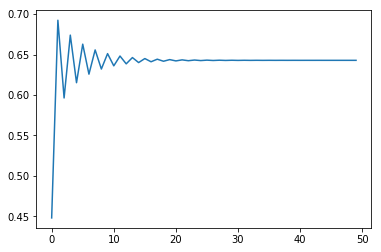

In [19]:
def plot_iter(x0, r, max_iter):
    X = []
    for t in range(max_iter):
        x1 = it_map(x0,r)
        X.append(x1)
        x0 = x1

    t_vec = range(max_iter)

    plt.plot(t_vec, X)

plot_iter(x0, r, max_iter)

as you can see, at r=2.8, x oscillates then settles to a single value.
Lets try r = 3

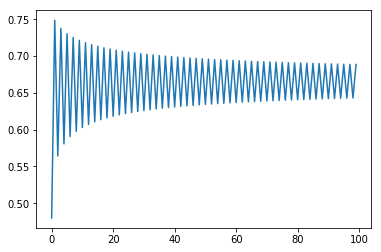

In [20]:
plot_iter(x0, 3, 100)

value oscillates, and settles to oscillating between two separate values.
This can be better visualised using a cobweb diagram.

First we define a cobweb function:

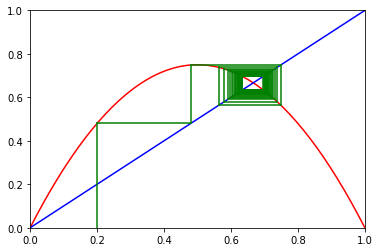

In [34]:
def cobweb(fn, x0, lim, max_iter, *args):
    """fn is funcion to plot, x0 is initial value, lim is 
    limits to plot over, max iter is max num of iterations"""
    x = np.linspace(lim[0], lim[1])
    fn_t = fn(x, *args)
    plt.plot(x, fn_t, 'r-')
    plt.plot(x, x, 'b-')
    plt.axis(lim)
    p0 = [x0,0]
    
    for i in range(max_iter):
        x1 = fn(x0, *args)
        p1 = [x0,x1]
        plt.plot([p0[0], p1[0]], [p0[1], p1[1]], 'g-')
        x2 = fn(x0, *args)
        p2 = [x1, x2]
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'g-')
        p0 = p2
        x0 = x2
    plt.show()
cobweb(it_map, x0, [0, 1, 0, 1], 50, 3)

cool heh? lets zoom in on the area of convergence
cobweb(it_map, 0.65, [0.5, .7, .5, .7], 50, r)

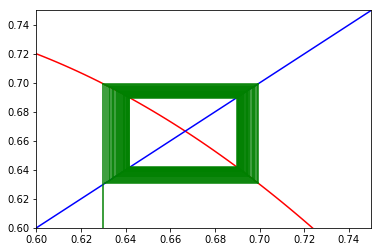

In [40]:
cobweb(it_map, 0.63, [0.6, .75, .6, .75], 50, 3)

X oscillates between two values. 
Lets try another value of r, r = 3.5

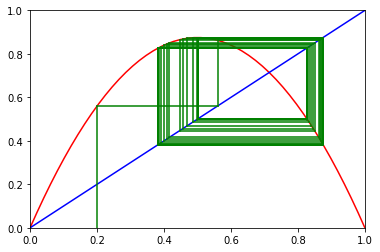

In [46]:
cobweb(it_map, x0, [0, 1, 0, 1], 50, 3.5)

oscilates between rather more values. 
To better explore the number of values that x settles to, another function is needed.


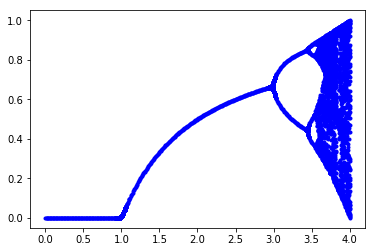

In [58]:
def plot_r(fn, num_vals):
    """num_vals is number of different values to examine r at between 0 and 4"""
    r_vec = np.linspace(0,4,num_vals)
    
    for i in range(num_vals):
        r = r_vec[i]
        x0 = 0.2
        X = []
        for j in range(100): #run though first hundered iterations
            x1 = fn(x0, r)
            x0 = x1
        for j in range(50): #now value has settled down, get convergence points
            X.append(x0)
            x1 = fn(x0, r)
            x0 = x1
        X=np.array(X)
        u = np.unique(X.round(5)) #can use uniquetol in MATLAB
        x_vec = [r]*len(u)
        plt.plot(x_vec, u, 'b.')
    plt.show()
plot_r(it_map, 500)

Wow! what a lovely diagram.. showing that the system converges to 0 for values of 4 below 1, converges to one number between 1 and 3, then converges to 2 numbers between 3 and 3.3, then 4, then 8, then you can't see it really, but the numebr doubles and doubles until it reaches infinity at 3.59 ish. after that, there appears to be a repeating fractal geometry, with the same bifurcation pattern appearing again and again.
